CSE 5243 - April 17th, 2018

# Lab 5 Classification



## 1. K-means from Scratch

In [206]:
import pandas as pd
import numpy as np
from random import random
df=pd.read_csv("TwoDimHard.csv", sep=',',engine='python')

tCluster = df['cluster']
data = df.drop('cluster',1)

### Description of kMeanCluster function

This function use Euclidean distance to calculate the distance between every object and the centroid point. In every iteration the objects are assigned to the cluster whose centroid is closest to the object. After the assignment, the controid is updated according to the current clusters. The algorithm ends when the cluster change in the iteration is 0.

In [88]:
def eucDis(ob1,ob2):
    delX1 = ob1['X.1']-ob2['X.1']
    delX2 = ob1['X.2']-ob2['X.2']
    return np.sqrt(np.power(delX1,2)+np.power(delX2,2))

In [120]:
def kMeanCluster(data,k):
    # generate initial random centroids
    clusters = np.zeros(data.shape[0])
    centroid = []
    for i in range(k):
        centroid.append({'X.1':0,'X.2':0})
        centroid[i]['X.1']=random()*(data['X.1'].max()-data['X.1'].min())+data['X.1'].min()
        centroid[i]['X.2']=random()*(data['X.2'].max()-data['X.2'].min())+data['X.2'].min()
    #Calculate all distances
    while True:
        changeCount = 0
        for i,obj in data.iterrows():
            minDis = 2147483647
            curClu = -1
            for j in range(k):
                curDis = eucDis(centroid[j],obj)
                if curDis<minDis:
                    minDis =curDis
                    curClu = j
            if curClu != clusters[i]:
                changeCount +=1
                clusters[i]=curClu
        #Update Centroid
        cluCount=np.zeros(k)
        cluSum=np.zeros([k,2])
        for i in range(data.shape[0]):
            clu = int(clusters[i]);
            cluCount[clu]+=1
            cluSum[clu][0]+=data.loc[i]['X.1']
            cluSum[clu][1]+=data.loc[i]['X.2']
        for i in range(k):
            centroid[i]['X.1']=cluSum[i][0]/cluCount[i]
            centroid[i]['X.2']=cluSum[i][1]/cluCount[i]
        if changeCount==0:
            break
    return clusters

### Calculate SSE and SSB for True Clusters
The SSE for cluster 1,2,3,4 are 0.31284772, 0.90, 0.43 and 1.91. The total SSE is 5.56. The Total SSB is 95.40

In [224]:
def calSS(df,n):
    clu = []
    for i in range(n):
        clu.append([])
    SSE = np.zeros(n)
    SSB = 0
    centroid={'X.1': np.average(df['X.1']),'X.2': np.average(df['X.2'])}
    for i,obj in df.iterrows():
        cluI = int(obj['cluster'])-1
        clu[cluI].append(obj[1:3])
    index =0
    for i in clu:
        sum1 =0;
        sum2 =0;
        for j in i:
            sum1 += j['X.1']
            sum2 += j['X.2']
        ctrd ={'X.1': sum1/len(i),'X.2': sum2/len(i)}
        SSB +=len(i)*eucDis(ctrd,centroid)
        for j in i:
            SSE[index]+=np.power(eucDis(ctrd,j),2)
        index+=1
    return SSE,SSB

In [214]:
SSE,SSB = calSS(df,4)
SSETotal = sum(SSE)
print(SSETotal)
print(SSE)
print(SSB)

5.5562155181714
[0.31284772 0.90253362 2.43011872 1.91071547]
95.40083880633037


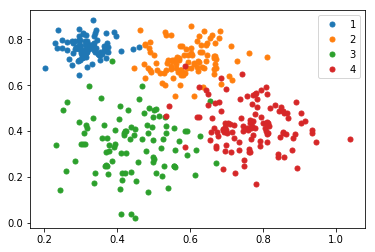

In [204]:
import matplotlib.pyplot as plt
def drawScatter(df):
    groups = df.groupby('cluster')

    fig, ax = plt.subplots()
    ax.margins(0.05) # adds 5% padding to the autoscaling

    for name, group in groups:
        ax.plot(group['X.1'], group['X.2'], marker='o', linestyle='', ms=5, label=name)
    ax.legend()

    plt.show()
drawScatter(df)

## K-means on TwoDimHard dataset with k=4


In [245]:
clusters = kMeanCluster(df,4)
output = pd.DataFrame(clusters)
output.to_csv("k4.csv",sep =',',header=['cluster'])
k4df = df.copy()
k4df['cluster']=clusters
SSE4,SSB4 = calSS(k4df,4)
SSE4Total = sum(SSE4)

The SSE and SSB for 4 clusters are as following:

In [246]:
print(SSE4Total)
print(SSE4)
print(SSB4)

4.892102869557148
[0.50048058 1.07648509 1.84460301 1.47053419]
96.33677728561318


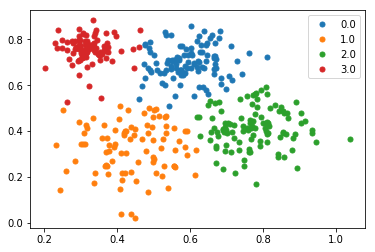

In [205]:
drawScatter(k4df)

In [207]:
pd.crosstab(tCluster,clusters)

col_0,0.0,1.0,2.0,3.0
cluster,,,,
1,0,0,0,89
2,98,0,0,2
3,2,88,3,4
4,8,2,104,0


## K-means on TwoDimHard dataset with k=3

In [247]:
clusters = kMeanCluster(df,3)
k3df = df.copy()
k3df['cluster']=clusters
SSE3,SSB3 = calSS(k3df,3)
SSE3Total = sum(SSE3)
print(SSE3Total)
print(SSE3)
print(SSB3)

8.564674842697507
[2.03947997 4.56579404 1.95940084]
90.63695333263351


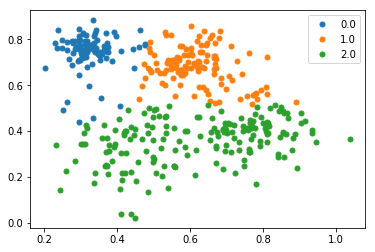

In [226]:
drawScatter(k3df)

In [227]:
pd.crosstab(tCluster,clusters)

col_0,0.0,1.0,2.0
cluster,,,
1,89,0,0
2,4,96,0
3,8,3,86
4,0,20,94


## Compare between K=3 and K=4
Changing the parameters does change the result. The clusters when k = 3 are worse than the clusters when k = 4.

The proportion of SSB in TSS in K=3 is 89% and in K=4 is 95%, which means there is more cohesion in the clusters and more separation between clusters when k=4. 

The SSB is decreased by 5.7 and SSE Total is increased by 3.67

In [249]:
print(SSB4-SSB3)
print(SSE3Total-SSE4Total)

5.699823952979671
3.672571973140359
